In [38]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [39]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [40]:
# dataframes creation for both training and testing datasets 
train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [41]:
# Create training and testing arrays
training = np.array(train_df, dtype = 'float32')
testing = np.array(test_df, dtype='float32')

In [42]:
training.shape

(60000, 785)

3.0

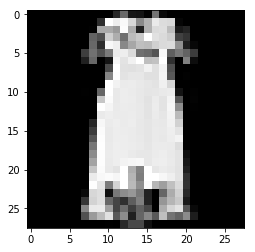

In [43]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

label = training[i,0]
label

In [44]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [46]:
X_train.shape

(48000, 784)

In [47]:
y_train.shape

(48000,)

In [48]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [58]:
# Initialising the CNN
classifier = Sequential()

In [59]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

In [60]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [61]:
# If another convolution layer is desired -- add here

In [62]:
# Step 3 - Flattening
classifier.add(Flatten())

In [63]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

In [64]:
# Compiling the CNN -- ensure loss is correct for type of model
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [65]:
epochs = 50

history = classifier.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

C:\Users\Zach Barrett\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 401us/step - loss: 0.7092 - acc: 0.7750 - val_loss: 0.4199 - val_acc: 0.8529
Epoch 2/50
48000/48000 [==============================] - 19s 397us/step - loss: 0.3972 - acc: 0.8591 - val_loss: 0.3648 - val_acc: 0.8720
Epoch 3/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.3488 - acc: 0.8768 - val_loss: 0.3448 - val_acc: 0.8799
Epoch 4/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.3186 - acc: 0.8881 - val_loss: 0.3169 - val_acc: 0.8896
Epoch 5/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.2973 - acc: 0.8957 - val_loss: 0.2992 - val_acc: 0.8945
Epoch 6/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.2785 - acc: 0.9020 - val_loss: 0.2842 - val_acc: 0.8992
Epoch 7/50
48000/48000 [==============================] - 20s 410us/step - loss: 0.2631 - acc: 0.9071 - val_loss: 0.

In [ ]:
# Evaluation:

In [66]:
evaluation = classifier.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 105us/step
Test Accuracy : 0.919


In [67]:
# get the predictions for the test data
predicted_classes = classifier.predict_classes(X_test)

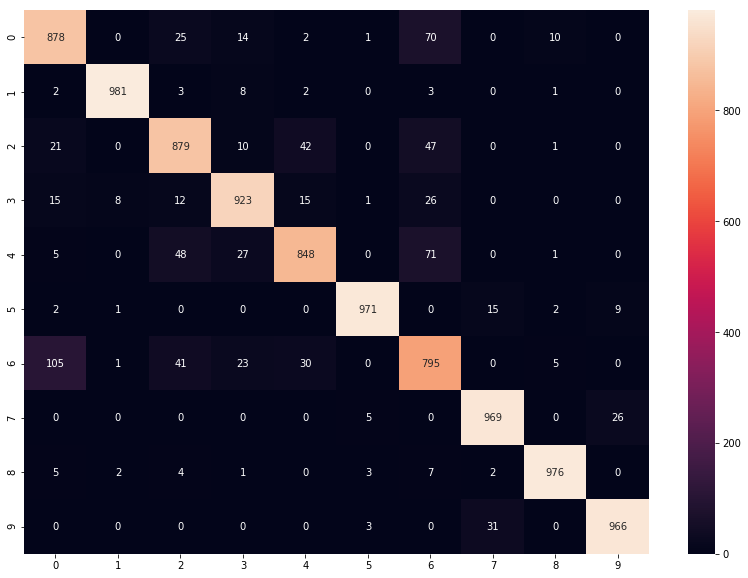

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')